## Dependency analysis

This notebook contains analysis of dependencies in Common Criteria certificates.

In [142]:
# QUICK FIX: local import of sec-certs => gonna be deleted later
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sec_certs.dataset.common_criteria import CCDataset
from typing import Tuple, List

plt.style.use("ggplot')

In [144]:
dset: CCDataset = CCDataset.from_json("/home/george/Downloads/dependency_json_final.json")
dset._compute_dependencies()
df = dset.to_pandas()

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 4616 rows and 20 columns.


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4616 entries, a89ee15539d006d1 to 09b17cb9b3c8b1bb
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cert_id                 3252 non-null   object        
 1   name                    4616 non-null   object        
 2   status                  4616 non-null   category      
 3   category                4616 non-null   category      
 4   manufacturer            4615 non-null   object        
 5   scheme                  4616 non-null   category      
 6   security_level          4616 non-null   object        
 7   not_valid_before        4616 non-null   datetime64[ns]
 8   not_valid_after         4327 non-null   datetime64[ns]
 9   report_link             4616 non-null   object        
 10  st_link                 4616 non-null   object        
 11  manufacturer_web        4554 non-null   object        
 12  extracted_versions      46

In [146]:
df.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,not_valid_before,not_valid_after,report_link,st_link,manufacturer_web,extracted_versions,cpe_matches,verified_cpe_matches,related_cves,directly_affected_by,indirectly_affected_by,directly_affecting,indirectly_affecting
dgst,,,,,,,,,,,,,,,,,,,,
a89ee15539d006d1,NaN,DriveLock Agent 2019.2 (Device and Application...,active,Access Control Devices and Systems,DriveLock SE,SE,"[ALC_FLR.3, EAL3]",2021-04-07,2026-04-07,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.drivelock.com/,[2019.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN
309ac2fd7f2dcf17,NaN,NetIQ Identity Manager 4.7,active,Access Control Devices and Systems,NetIQ Corporation,SE,"[ALC_FLR.2, EAL3+]",2020-06-15,2025-06-15,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.netiq.com/,[4.7],NaN,NaN,NaN,NaN,NaN,NaN,NaN
8cf86948f02f047d,KECS-CR-19-70,Magic SSO V4.0,active,Access Control Devices and Systems,"Dreamsecurity Co., Ltd.",KR,[],2019-11-15,2024-11-15,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.dreamsecurity.com/,[4.0],NaN,NaN,NaN,NaN,NaN,{},{}
0fc32111e368dcf5,NSCIB-CC-0006151-CR,NetIQ Access Manager 4.5,active,Access Control Devices and Systems,"NetIQ, Incorporated",NL,"[ALC_FLR.1, EAL3+]",2019-11-07,2024-11-07,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.netiq.com/,[4.5],[cpe:2.3:a:netiq:access_manager:4.5:-:*:*:*:*:...,NaN,NaN,NaN,NaN,{},{}
5e87de1cddf1ae43,NaN,Illumio Adaptive Security Platform v18.2.2,active,Access Control Devices and Systems,Illumio,CA,[],2019-07-12,2024-07-12,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.illumio.com/,[18.2.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How many archived certificates are in dataset?

In [147]:
archived_df = df[df["status"] == "archived"]

print(f"There are total {archived_df.shape[0]} archived certificates.")

There are total 3057 archived certificates.


### How many active certificates are in dataset?

In [148]:
active_df = df[df["status"] == "active"]

print(f"There are total {active_df.shape[0]} active certificates.")

There are total 1559 active certificates.


Text(0.5, 1.0, 'Archived certs vs. active certs')

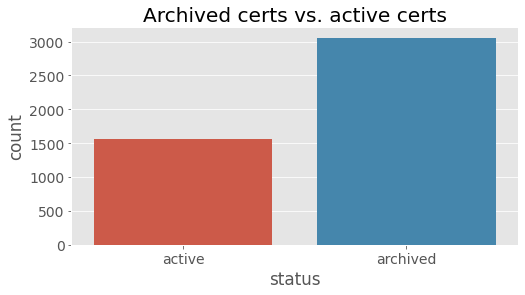

In [149]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})
sns.countplot(x=df["status"]).set_title("Archived certs vs. active certs")

### Which certificates are heavily referenced by others?

In [105]:
def count_directly_affected_by(references):
    return len(references)

directly_affected_by_df = df[df["directly_affected_by"].notna()].copy()
directly_affected_by_df["directly_affected_by_sum"] = directly_affected_by_df["directly_affected_by"].apply(count_directly_affected_by)
directly_affected_by_df.sort_values(by="directly_affected_by_sum", ascending=False, inplace=True)
directly_affected_by_df.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,not_valid_before,not_valid_after,report_link,...,manufacturer_web,extracted_versions,cpe_matches,verified_cpe_matches,related_cves,directly_affected_by,indirectly_affected_by,directly_affecting,indirectly_affecting,directly_affected_by_sum
dgst,,,,,,,,,,,,,,,,,,,,,
f041e5b526e79ef4,BSI-DSZ-CC-0410-2007,"NXP Secure Smart Card Controller P5CD080V0B, P...",archived,"ICs, Smart Cards and Smart Card-Related Device...",NXP Semiconductors Germany GmbH Business Line ...,DE,"[ALC_DVS.2, AVA_MSU.3, AVA_VLA.4, EAL5+]",2007-07-05,2019-09-01,https://www.commoncriteriaportal.org/files/epf...,...,https://www.nxp.com,[-],NaN,NaN,NaN,"[BSI-DSZ-CC-0798-2012, BSI-DSZ-CC-0797-2012, B...","{BSI-DSZ-CC-0799-2012, BSI-DSZ-CC-0643-2010, B...",{BSI-DSZ-CC-0404-2007},{BSI-DSZ-CC-0404-2007},33
9dab3f1341f54c42,BSI-DSZ-CC-0555-2009,NXP Smart Card Controller P5CD081V1A and its m...,archived,"ICs, Smart Cards and Smart Card-Related Device...",NXP Semiconductors,DE,[EAL5+],2009-11-10,2019-09-01,https://www.commoncriteriaportal.org/files/epf...,...,https://www.nxp.com/,[-],NaN,NaN,NaN,"[BSI-DSZ-CC-0784-2013, BSI-DSZ-CC-0857-2013, B...","{BSI-DSZ-CC-0866-V2-2014, BSI-DSZ-CC-0799-2012...",{},{},19
dbbf02a1cd0ad33b,ANSSI-CC-2010/02,STMicroelectronics SA23YR48/80B and SB23YR48/8...,archived,"ICs, Smart Cards and Smart Card-Related Device...",STMicroelectronics,FR,"[ALC_FLR.1, EAL6+]",2010-02-10,2019-09-01,https://www.commoncriteriaportal.org/files/epf...,...,https://www.st.com/,"[2.0, 3.0]",NaN,NaN,NaN,"[BSI-DSZ-CC-0877-2013, ANSSI-CC-2010/34, BSI-D...","{ANSSI-CC-2010/34, ANSSI-CC-2010/22, ANSSI-CC-...",{},{},19
7d4585a4b5b6e873,ANSSI-CC-2010/02,Ucard UBJ31-G11 V1.1,archived,"ICs, Smart Cards and Smart Card-Related Device...",UBIVELOX,KR,"[ALC_DVS.2, AVA_VAN.5, EAL4+]",2012-10-31,2019-06-01,https://www.commoncriteriaportal.org/files/epf...,...,https://www.ubivelox.com,[1.1],NaN,NaN,NaN,"[BSI-DSZ-CC-0877-2013, ANSSI-CC-2010/34, BSI-D...","{ANSSI-CC-2010/34, ANSSI-CC-2010/22, ANSSI-CC-...",{},{},19
f2c2231b0ffae4d7,BSI-DSZ-CC-0978-2016,NXP Secure Smart Card Controller P60x144/080yV...,archived,"ICs, Smart Cards and Smart Card-Related Device...",NXP Semiconductors Germany GmbH Business Line ...,DE,"[ALC_FLR.1, ASE_TSS.2, EAL6+]",2016-02-05,2021-02-05,https://www.commoncriteriaportal.org/files/epf...,...,https://www.nxp.com,[-],NaN,NaN,NaN,"[BSI-DSZ-CC-0978-V2-2017, BSI-DSZ-CC-0957-V2-2...","{ANSSI-CC-2016/40, BSI-DSZ-CC-0809-V3-2017, AN...",{},{},18


Text(0.5, 1.0, 'Distribution of categories among heavily referenced certificates')

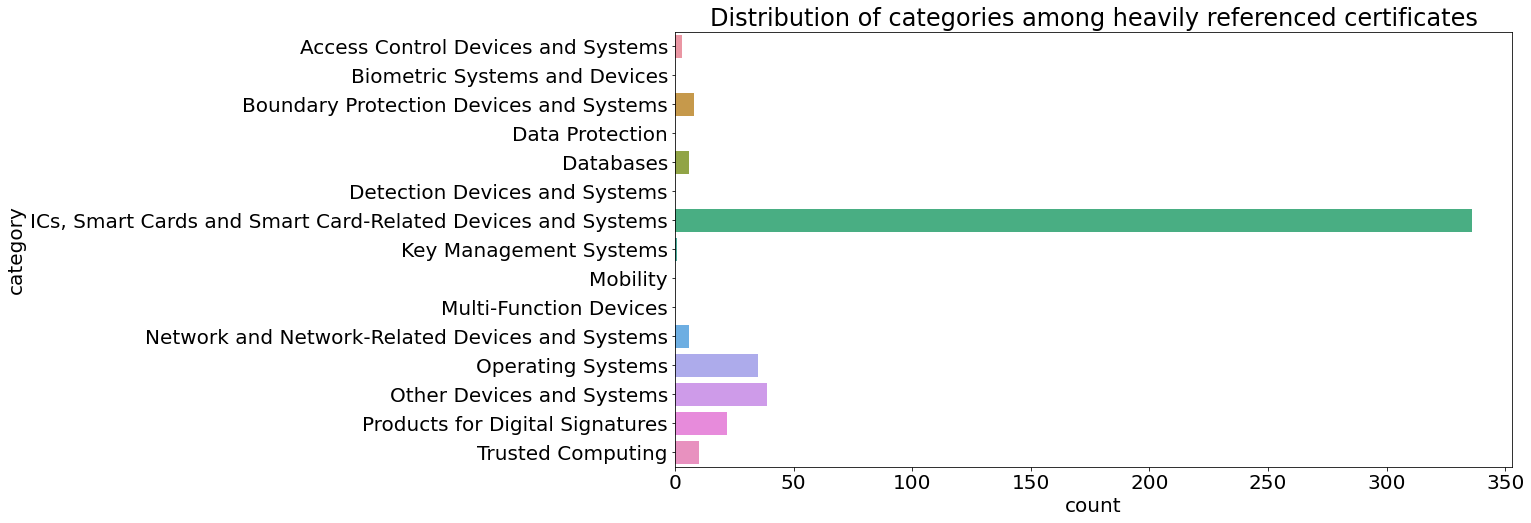

In [10]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 20})
sns.countplot(y=directly_affected_by_df["category"]).set_title("Distribution of categories among heavily referenced certificates")

### What certificates are referencing no other?

In [116]:
no_affecting_df = df[df["directly_affecting"].isna() & df["indirectly_affecting"].isna()]

print(f"There are total {no_affecting_df.shape[0]} certificates referencing no other certificates.")

There are total 1357 certificates referencing no other certificates.


In [107]:
no_affecting_df.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,not_valid_before,not_valid_after,report_link,st_link,manufacturer_web,extracted_versions,cpe_matches,verified_cpe_matches,related_cves,directly_affected_by,indirectly_affected_by,directly_affecting,indirectly_affecting
dgst,,,,,,,,,,,,,,,,,,,,
a89ee15539d006d1,NaN,DriveLock Agent 2019.2 (Device and Application...,active,Access Control Devices and Systems,DriveLock SE,SE,"[ALC_FLR.3, EAL3]",2021-04-07,2026-04-07,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.drivelock.com/,[2019.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN
309ac2fd7f2dcf17,NaN,NetIQ Identity Manager 4.7,active,Access Control Devices and Systems,NetIQ Corporation,SE,"[ALC_FLR.2, EAL3+]",2020-06-15,2025-06-15,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.netiq.com/,[4.7],NaN,NaN,NaN,NaN,NaN,NaN,NaN
5e87de1cddf1ae43,NaN,Illumio Adaptive Security Platform v18.2.2,active,Access Control Devices and Systems,Illumio,CA,[],2019-07-12,2024-07-12,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.illumio.com/,[18.2.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN
073b442ab4f199e8,NaN,openNAC Enterprise v1.2,active,Access Control Devices and Systems,Open Cloud Factory,ES,[EAL2],2019-06-18,2024-06-18,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://www.opencloudfactory.com/,[1.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN
306aea974282ec5a,NaN,"OAM (Operation, Administration & Management/Ma...",active,Access Control Devices and Systems,Valiant Communications Limited 71/1 Shivaji Ma...,IN,[EAL1],2018-12-12,NaT,https://www.commoncriteriaportal.org/files/epf...,https://www.commoncriteriaportal.org/files/epf...,https://valiantcom.com/,"[6, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How many no affecting certificates are affected by other certificates?

In [117]:
affected_but_no_affecting_df = no_affecting_df[no_affecting_df["directly_affected_by"].notna() & no_affecting_df["indirectly_affected_by"].notna()]
print(f"There are total of {affected_but_no_affecting_df.shape[0]} certificates which are affected by other certificates and affecting no certificates.")

There are total of 0 certificates which are affected by other certificates and affecting no certificates.


### How many certificates are not affected by other certificates, nor affecting other certificates?

In [140]:
condition = df["directly_affecting"].isna() & df["indirectly_affecting"].isna() & df["directly_affected_by"].isna() & df["indirectly_affected_by"].isna()
no_affecting_no_affected_df = df[condition]
no_affecting_no_affected_df.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,not_valid_before,not_valid_after,report_link,...,extracted_versions,cpe_matches,verified_cpe_matches,related_cves,directly_affected_by,indirectly_affected_by,directly_affecting,indirectly_affecting,depends_on_archived,is_bsi_cert
dgst,,,,,,,,,,,,,,,,,,,,,
a89ee15539d006d1,NaN,DriveLock Agent 2019.2 (Device and Application...,active,Access Control Devices and Systems,DriveLock SE,SE,"[ALC_FLR.3, EAL3]",2021-04-07,2026-04-07,https://www.commoncriteriaportal.org/files/epf...,...,[2019.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
309ac2fd7f2dcf17,NaN,NetIQ Identity Manager 4.7,active,Access Control Devices and Systems,NetIQ Corporation,SE,"[ALC_FLR.2, EAL3+]",2020-06-15,2025-06-15,https://www.commoncriteriaportal.org/files/epf...,...,[4.7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
5e87de1cddf1ae43,NaN,Illumio Adaptive Security Platform v18.2.2,active,Access Control Devices and Systems,Illumio,CA,[],2019-07-12,2024-07-12,https://www.commoncriteriaportal.org/files/epf...,...,[18.2.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
073b442ab4f199e8,NaN,openNAC Enterprise v1.2,active,Access Control Devices and Systems,Open Cloud Factory,ES,[EAL2],2019-06-18,2024-06-18,https://www.commoncriteriaportal.org/files/epf...,...,[1.2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
306aea974282ec5a,NaN,"OAM (Operation, Administration & Management/Ma...",active,Access Control Devices and Systems,Valiant Communications Limited 71/1 Shivaji Ma...,IN,[EAL1],2018-12-12,NaT,https://www.commoncriteriaportal.org/files/epf...,...,"[6, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


<AxesSubplot:xlabel='count', ylabel='scheme'>

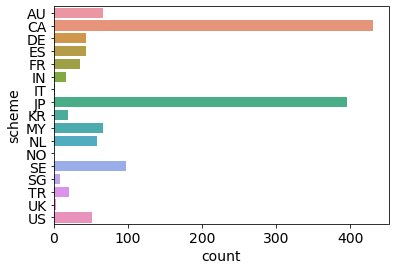

In [119]:
# Distribution of scheme between not affecting, not affected certificates
sns.countplot(y=no_affecting_no_affected_df["scheme"])

### Which certificates are dependent on the archived certificates?

In [120]:
archived_cert_id_list = df[df["cert_id"].notna() & (df["status"] == "archived")]["cert_id"].tolist()

def contains_archived_cert_dependency(affected_by):
    if affected_by is np.nan:
        return False
    
    for cert_id in affected_by:
        if cert_id in archived_cert_id_list:
            return True
        
    return False

df["depends_on_archived"] = df["directly_affected_by"].apply(contains_archived_cert_dependency)
df["depends_on_archived"]
depends_on_archived_df = df[df["depends_on_archived"] == True]

print(f"Total {depends_on_archived_df.shape[0]} certificates are affected by at least one archived certicates.")

Total 311 certificates are affected by at least one archived certicates.


Text(0.5, 1.0, 'Distribution of categories among certificates dependent on archived certs.')

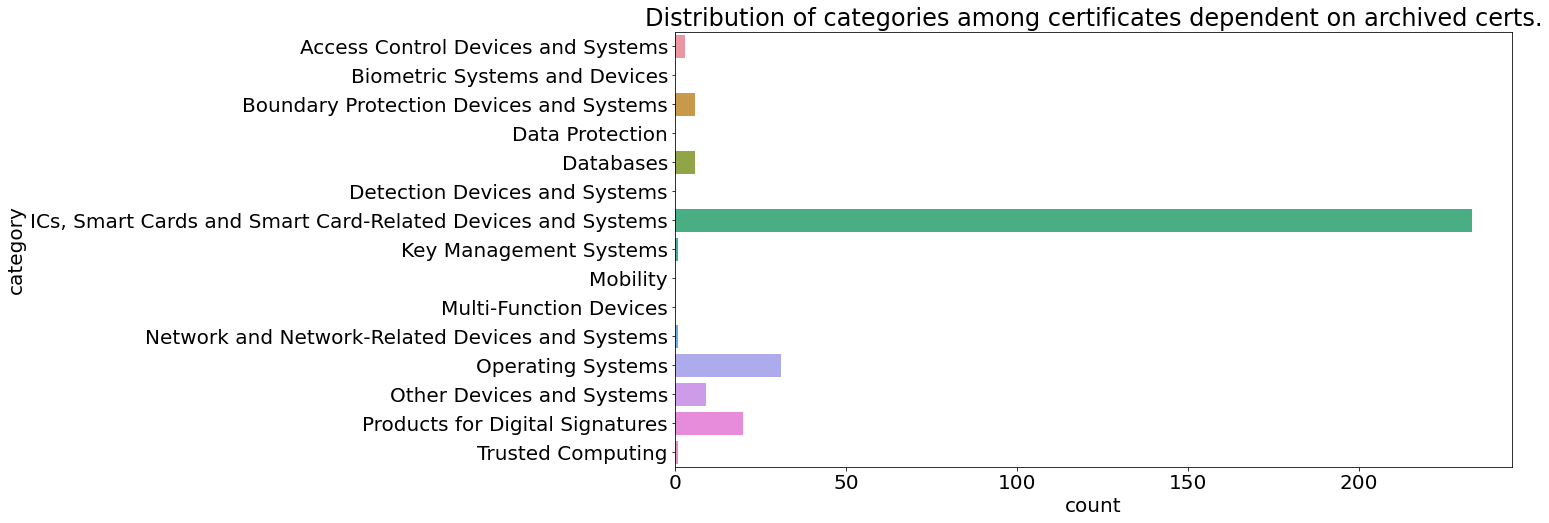

In [121]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 20})
sns.countplot(y=depends_on_archived_df["category"]).set_title("Distribution of categories among certificates dependent on archived certs.")

### How frequently are BSI certificates referencing ANSSI certs?

In [125]:
def is_bsi_cert(cert_id: str) -> bool:
    if cert_id is np.nan:
        return False
    
    if "bsi" in cert_id.lower():
        return True
    
    return False


def is_anssi_cert(cert_id: str) -> bool:
    if cert_id is np.nan:
        return False
    
    if "anssi" in cert_id.lower():
        return True

    return False


def is_affecting_anssi(directly_affecting: Set[str]) -> bool:
    if directly_affecting is np.nan:
        return False
    
    for cert_id in directly_affecting:
        if is_anssi_cert(cert_id):
            return True
        
    return False
    
df["is_bsi_cert"] = df["cert_id"].apply(is_bsi_cert)
bsi_df = df[df["is_bsi_cert"] == True].copy()
print(f"Total of {bsi_df.shape[0]} BSI certificates in dataset.")

bsi_df["is_affecting_anssi"] = bsi_df["directly_affecting"].apply(is_affecting_anssi)
bsi_affecting_anssi_df = bsi_df[bsi_df["is_affecting_anssi"] == True]

print(f"There are total {bsi_affecting_anssi_df.shape[0]} BSI certs affecting ANSSI certs.")

Total of 831 BSI certificates in dataset
There are total 16 BSI certs affecting ANSSI certs.


In [139]:
bsi_affecting_anssi_df.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,not_valid_before,not_valid_after,report_link,...,cpe_matches,verified_cpe_matches,related_cves,directly_affected_by,indirectly_affected_by,directly_affecting,indirectly_affecting,depends_on_archived,is_bsi_cert,is_affecting_anssi
dgst,,,,,,,,,,,,,,,,,,,,,
424f6d496746258b,BSI-DSZ-CC-1064-2020,MTCOS Pro 2.5 EAC with PACE / ST31G480 D01,active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"[ALC_DVS.2, AVA_VAN.5, EAL5+]",2020-09-29,2025-09-29,https://www.commoncriteriaportal.org/files/epf...,...,NaN,NaN,NaN,[BSI-DSZ-CC-1065-2020],{BSI-DSZ-CC-1065-2020},"{ANSSI-CC-2019/12, BSI-DSZ-CC-0995-2018}","{ANSSI-CC-2019/12, BSI-DSZ-CC-0973-2016, BSI-D...",False,True,True
b8437dbfeeaf0f04,BSI-DSZ-CC-1065-2020,MTCOS Pro 2.5 EAC with PACE / ST31G480 D01 (BAC),active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"[ALC_DVS.2, EAL4+]",2020-09-29,2025-09-29,https://www.commoncriteriaportal.org/files/epf...,...,NaN,NaN,NaN,NaN,NaN,"{ANSSI-CC-2019/12, BSI-DSZ-CC-1064-2020}","{ANSSI-CC-2019/12, BSI-DSZ-CC-1064-2020, BSI-D...",False,True,True
4832a44c0df0bad2,BSI-DSZ-CC-1074-V2-2020,Xaica-Alpha PLUS ePassport on MTCOS Pro 2.5 wi...,active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"[ALC_DVS.2, EAL4+]",2020-07-30,2025-07-30,https://www.commoncriteriaportal.org/files/epf...,...,NaN,NaN,NaN,NaN,NaN,"{BSI-DSZ-CC-1073-V2, ANSSI-CC-2019/12, BSI-DSZ...","{ANSSI-CC-2019/12, BSI-DSZ-CC-1073-V2, BSI-DSZ...",False,True,True
7f9eb1b8217d15ad,BSI-DSZ-CC-1073-V2-2020,Xaica-Alpha PLUS ePassport on MTCOS Pro 2.5 wi...,active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"[ALC_DVS.2, AVA_VAN.5, EAL4+]",2020-07-30,2025-07-30,https://www.commoncriteriaportal.org/files/epf...,...,NaN,NaN,NaN,NaN,NaN,"{BSI-DSZ-CC-1073-V2, ANSSI-CC-2019/12, BSI-DSZ...","{ANSSI-CC-2019/12, BSI-DSZ-CC-1073-V2, BSI-DSZ...",False,True,True
06e505abb8dad1b8,BSI-DSZ-CC-1003-2018,Smart Meter Gateway Security Module Applicatio...,active,"ICs, Smart Cards and Smart Card-Related Device...",Gemalto,DE,"[AVA_VAN.5, EAL4]",2018-09-18,2028-09-18,https://www.commoncriteriaportal.org/files/epf...,...,NaN,NaN,NaN,NaN,NaN,"{ANSSI-CC-2017/54, BSI-DSZ-CC-0891-V2-2016}","{ANSSI-CC-2017/54, BSI-DSZ-CC-0891-V2-2016, BS...",False,True,True


### Which certificates are referencing each other? (= are crossed referenced)

In [138]:
def is_already_involved(cross_reference_list: List[Tuple[str, str]], certs_set: Set[str]) -> bool:
    return certs_set in cross_reference_list

def is_cert_affecting_other_cert(root_cert_id: str, affected_cert_id: str) -> bool:
    return affected_cert_id in cross_df[cross_df["cert_id"] == root_cert_id].iloc[0]["directly_affecting"]

cross_reference_list: List[Set[str]] = []
cross_df = df[(df["cert_id"].notna()) & (df["directly_affecting"] != set())]
count = 1
total = cross_df.shape[0]

for cert_id in cross_df["cert_id"]:
    print(f"Processing {count}/{total} certificate")
    for another_cert_id in cross_df["cert_id"]:
        if cert_id == another_cert_id:
            continue
            
        certs_set = set([cert_id, another_cert_id])
        if is_cert_affecting_other_cert(cert_id, another_cert_id) and is_cert_affecting_other_cert(another_cert_id, cert_id) and not is_already_involved(cross_reference_list, certs_set):
            cross_reference_list.append(certs_set)
    count += 1 
    
    
print(cross_reference_list)
print(f"Total of {len(cross_reference_list)} crossed referenced certificates.")

Processing 1/646 certificate
Processing 2/646 certificate
Processing 3/646 certificate
Processing 4/646 certificate
Processing 5/646 certificate
Processing 6/646 certificate
Processing 7/646 certificate
Processing 8/646 certificate
Processing 9/646 certificate
Processing 10/646 certificate
Processing 11/646 certificate
Processing 12/646 certificate
Processing 13/646 certificate
Processing 14/646 certificate
Processing 15/646 certificate
Processing 16/646 certificate
Processing 17/646 certificate
Processing 18/646 certificate
Processing 19/646 certificate
Processing 20/646 certificate
Processing 21/646 certificate
Processing 22/646 certificate
Processing 23/646 certificate
Processing 24/646 certificate
Processing 25/646 certificate
Processing 26/646 certificate
Processing 27/646 certificate
Processing 28/646 certificate
Processing 29/646 certificate
Processing 30/646 certificate
Processing 31/646 certificate
Processing 32/646 certificate
Processing 33/646 certificate
Processing 34/646 c

Processing 269/646 certificate
Processing 270/646 certificate
Processing 271/646 certificate
Processing 272/646 certificate
Processing 273/646 certificate
Processing 274/646 certificate
Processing 275/646 certificate
Processing 276/646 certificate
Processing 277/646 certificate
Processing 278/646 certificate
Processing 279/646 certificate
Processing 280/646 certificate
Processing 281/646 certificate
Processing 282/646 certificate
Processing 283/646 certificate
Processing 284/646 certificate
Processing 285/646 certificate
Processing 286/646 certificate
Processing 287/646 certificate
Processing 288/646 certificate
Processing 289/646 certificate
Processing 290/646 certificate
Processing 291/646 certificate
Processing 292/646 certificate
Processing 293/646 certificate
Processing 294/646 certificate
Processing 295/646 certificate
Processing 296/646 certificate
Processing 297/646 certificate
Processing 298/646 certificate
Processing 299/646 certificate
Processing 300/646 certificate
Processi

Processing 534/646 certificate
Processing 535/646 certificate
Processing 536/646 certificate
Processing 537/646 certificate
Processing 538/646 certificate
Processing 539/646 certificate
Processing 540/646 certificate
Processing 541/646 certificate
Processing 542/646 certificate
Processing 543/646 certificate
Processing 544/646 certificate
Processing 545/646 certificate
Processing 546/646 certificate
Processing 547/646 certificate
Processing 548/646 certificate
Processing 549/646 certificate
Processing 550/646 certificate
Processing 551/646 certificate
Processing 552/646 certificate
Processing 553/646 certificate
Processing 554/646 certificate
Processing 555/646 certificate
Processing 556/646 certificate
Processing 557/646 certificate
Processing 558/646 certificate
Processing 559/646 certificate
Processing 560/646 certificate
Processing 561/646 certificate
Processing 562/646 certificate
Processing 563/646 certificate
Processing 564/646 certificate
Processing 565/646 certificate
Processi